In [238]:
import functools
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [239]:
##leer archivo con pandas
#mat = pd.read_csv('/Users/ianzaidenweber/Desktop/IA/estudiantes/mat_clean.csv')
#mat = pd.read_csv('/Users/bernardoaltamirano/Google Drive/ITAM/9no_Semestre/IA/proyectos/estudiantes-tensorflow/estudiantes/mat_clean.csv')
mat = pd.read_csv('/Users/bernardoaltamirano/Google Drive/ITAM/9no_Semestre/IA/proyectos/estudiantes-tensorflow/estudiantes/student-mat.csv', ';')
mat = mat.drop(['school','sex','address','famsize', 'Pstatus', 'Mjob','Fjob','reason', 'guardian', 'schoolsup', 'activities', 'nursery', 'higher','internet', 'romantic', 'famsup', 'paid'], axis=1)
mat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [240]:
#Estandarizar datos
mat_norm = (mat - mat.mean()) / mat.std()
mat_norm.head(5)



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.021751,1.142407,1.358648,0.791247,-0.042232,-0.449374,0.062115,-0.235711,0.800464,-0.540014,-1.002518,-0.398784,0.036378,-1.780209,-1.253202,-0.963712
1,0.238078,-1.597982,-1.398197,-0.642435,-0.042232,-0.449374,1.177367,-0.235711,-0.097784,-0.540014,-1.002518,-0.398784,-0.213525,-1.780209,-1.519053,-0.963712
2,-1.329268,-1.597982,-1.398197,-0.642435,-0.042232,3.584777,0.062115,-0.235711,-0.996032,0.582646,0.550402,-0.398784,0.536185,-1.177653,-0.721500,-0.090624
3,-1.329268,1.142407,-0.479249,-0.642435,1.149321,-0.449374,-1.053136,-1.236851,-0.996032,-0.540014,-1.002518,1.039751,-0.463428,1.232570,0.873607,1.000735
4,-0.545595,0.228944,0.439699,-0.642435,-0.042232,-0.449374,0.062115,-0.235711,-0.996032,-0.540014,-0.226058,1.039751,-0.213525,-1.478931,-0.189797,-0.090624


In [241]:
#desestandariza para los resultados
y_mean = mat['G3'].mean()
y_std = mat['G3'].std()


In [242]:
def convert_label_value(pred):
  #return int(np.round((pred * y_std + y_mean),0))
  return float(pred * y_std + y_mean)

print(convert_label_value(1.000735))

14.99999984473465


In [243]:
#crear columna con diferencia de parcial 2 y parcial 1
mat_norm['Grade_dif']=mat_norm.G2-mat_norm.G1

#crear df para variable objetivo y para variables de soporte
Y = mat_norm.G3 
X = mat_norm.drop('G3', axis=1)

In [244]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade_dif
0,1.021751,1.142407,1.358648,0.791247,-0.042232,-0.449374,0.062115,-0.235711,0.800464,-0.540014,-1.002518,-0.398784,0.036378,-1.780209,-1.253202,0.527007
1,0.238078,-1.597982,-1.398197,-0.642435,-0.042232,-0.449374,1.177367,-0.235711,-0.097784,-0.540014,-1.002518,-0.398784,-0.213525,-1.780209,-1.519053,0.261156
2,-1.329268,-1.597982,-1.398197,-0.642435,-0.042232,3.584777,0.062115,-0.235711,-0.996032,0.582646,0.550402,-0.398784,0.536185,-1.177653,-0.721500,0.456154
3,-1.329268,1.142407,-0.479249,-0.642435,1.149321,-0.449374,-1.053136,-1.236851,-0.996032,-0.540014,-1.002518,1.039751,-0.463428,1.232570,0.873607,-0.358963
4,-0.545595,0.228944,0.439699,-0.642435,-0.042232,-0.449374,0.062115,-0.235711,-0.996032,-0.540014,-0.226058,1.039751,-0.213525,-1.478931,-0.189797,1.289134


In [245]:
Y.head()

0   -0.963712
1   -0.963712
2   -0.090624
3    1.000735
4   -0.090624
Name: G3, dtype: float64

In [246]:
#hacer el split de test y train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [247]:
#extraer valores numericos unicamente
X_arr = X.values
Y_arr = Y.values

In [248]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (mat.shape[1],), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
    )
    
    return model

In [249]:
model = get_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_81 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_82 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 6         
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [250]:
#detiene las iteraciones en caso de que hayan k iteraciones sin mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience = 300)

model = get_model()

In [251]:
#antes de entrenar, hace predicciones aleatorias para comparar con modelo entrenado
preds_on_untrained = model.predict(X_test)
preds_on_untrained[:5]

array([[-0.05467474],
       [-0.04930111],
       [ 0.10713016],
       [-0.09501825],
       [ 0.06714049]], dtype=float32)

In [252]:

#entrena modelo
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

ch 187/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0488 - val_loss: 0.2072
Epoch 188/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0376 - val_loss: 0.2109
Epoch 189/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0440 - val_loss: 0.2064
Epoch 190/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.2160
Epoch 191/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0389 - val_loss: 0.2092
Epoch 192/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0424 - val_loss: 0.2173
Epoch 193/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0382 - val_loss: 0.2091
Epoch 194/1000
10/10 [==============================] - 0s 28ms/step - loss: 0.0411 - val_loss: 0.2145
Epoch 195/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.2119
Epoch 196/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0367 -

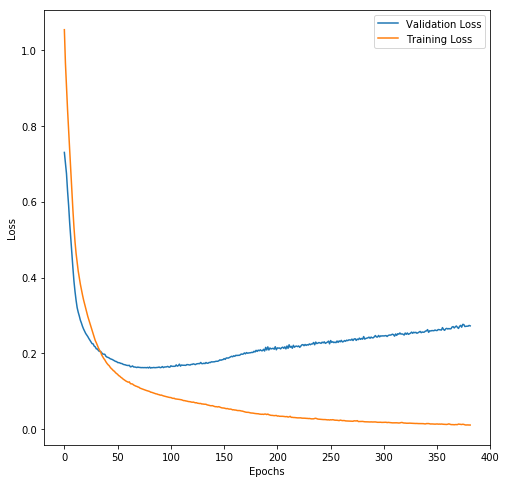

In [253]:

#perdida de entrenamiento y validacion
plot_loss(history)

In [254]:
#compara predicciones del modelo no-entrenado y entrenado
preds_on_trained = model.predict(X_test)
preds_on_trained[:5]

array([[1.3292769 ],
       [0.36651504],
       [0.0125391 ],
       [0.75394523],
       [0.9557456 ]], dtype=float32)

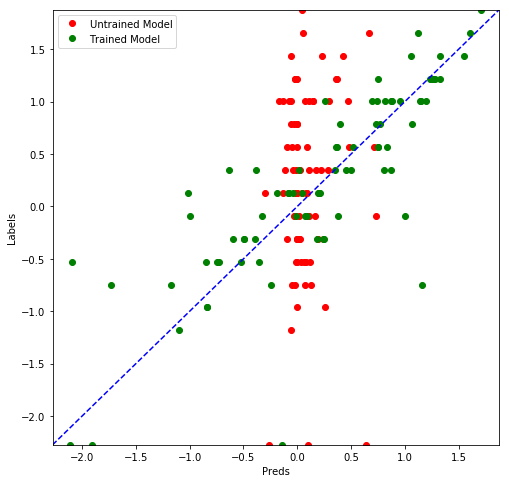

In [255]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [256]:
#compara predicciones
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

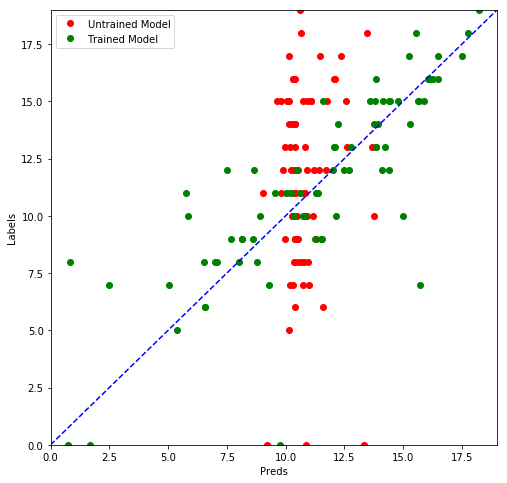

In [257]:
compare_predictions(price_on_untrained, price_on_trained, price_y_test)